# Machine Learning and Regression Analysis
$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

We leverage 4 regression models:Linear Regression, classical Gradient Boosting Regression, Random Forest Regression and XGBoosing Regression to estimate the sale prices of housing properties. Parameters in each model will be tuned to search for better models in terms of estimation accuracy. Two standards are used to evaluate the performances of models, in other words, the accuracies of price estimation for different models.
<ul>
  <li> <b>RMSE:</b>  Root Mean Square Error  (https://en.wikipedia.org/wiki/Root-mean-square_deviation)
  <li> <b>MAPE:</b>  Mean Absolute Percentage Error   (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
)
</ul>
</div>
<br/>
<div class="span5 alert alert-success">
<h4>Comments on evaluation standards</h4>
<ul>
  <li> Good models should have both relatively low RMSEs and MAPEs. </li>
  <li> It is to be expected though RMSE and MAPE will NOT increase/decrease simultaneously. In a situation where Model A have lower RMSE than that of Model B but the MAPE of Model A is greater than the MAPE of Model B, we need to decide which model is suprior than the other. Depending on clients' perferences, the error used in evaluation of models is based on the following intuition.</li>
   <ul>  
      
   <li> A low RMSE indicates accurate estimation of high-valued and mediate-valued housing properties but does not rule out the risk of inaccurate estimation of low-valued housing properties. </li>
      
   
   <li> A low MAPE indicates accurate estimation of low-valued and mediate-valued housing properties but does not rule out the risk of inaccurate estimation of high-valued housing properties. </li>  
      
   </ul>   
  
   
</ul>
</div>


The following steps will be done to set up machine learning models. 

<ul>
  <li> A preliminary feature selection based on the results on previous Exploratory Data Analysis to avoid dependence among feature variables and to filter out irrelevant features. </li>
</ul>

<ul>
  <li> One-Hot-Encoding to categorical data. In previous data processing, categorical data has been encoded to numerics by a frequency method, which does not preserve all the information on the original data set. One-Hot-Encoding, on the other hand, captures all the information on the original data set. Hence, we will use One-Hot-Encoding to further process the data for the purpose of achieving better performances of machine learning models.</li>
</ul>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Load the processed data set (which is ready for EDA)

In [41]:
import pandas as pd
import numpy as np
df = pd.read_csv('gdrive/My Drive/Ready_for_EDA_2019_1_13.csv')
print(df.head())
print(len(df))
print(df.columns)

    FID StreetNumber  StreetName  LandUse  CurrentAcres  TotalGrossArea  \
0  1004           69          32     5176       0.05597            1760   
1  1005           25          21     5176       0.08242            2676   
2  1006          133         137     2150       0.00000            2184   
3  1007           14          10     5176       0.09832            3699   
4  1009          237         499      367       0.70154           62852   

   FinishedArea  CurrentValue  CurrentLandValue  CurrentYardItemsValue  \
0     840.00000      152500.0            121600                      0   
1    1436.00000      241900.0             94400                    700   
2    1572.80005      268000.0                 0                      0   
3    2087.00000      340800.0            130100                      0   
4   37977.00000     1905600.0            547700                  51800   

           ...            YearBlt  SalePrice  NumofRooms  NumofBedrooms  \
0          ...               

## A preliminary feature selection for machine learning is as follows.
<ul> 
    <li> <b>1.</b>FID should not be used in any type of analysis.</li>
</ul>
<ul> 
    <li> <b>2.</b>Since StreetName, StreetNumber, ZoningCode are all location variables which are less significant in determining SalePrice than the coordinate variables, as seen in Statistical Analysis, we will not use them as features in machine learning. However, we will preserve PropertyCenterPoint_x and PropertyCenterPoint_y.</li>
</ul>
<ul>
    <li> <b>3.</b>It has been found in the data cleaning step that CurrentValue = CurrentLandValue+CurrentYardItemsValue+CurrentBuildingValue. CurrentValue and SalePrice is linearly related. We will preserve SalePrice, CurrentLandValue, CurrentYardItemsValue, CurrentBuildingValue but ignore CurrentValue in machine learning algorithms.
    </li>
</ul>
<ul> 
    <li> <b>4.</b>Recall NumofRooms and NumofBedrooms are strongly linearly related, and that SalePrice depends more on NumofRooms than on NumofBedrooms based on the correlation matrix, we will use NumofRooms instead of NumofBedrooms as a feature in machine learning algorithms.</li>
</ul>

In [42]:
df_feature = df[['LandUse','CurrentAcres', 'TotalGrossArea', 'FinishedArea', 
                 'CurrentLandValue', 'CurrentYardItemsValue', 'CurrentBuildingValue',
                 'BuildingType', 'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SalePrice',
                 'NumofRooms', 'NumofUnits', 'Foundation',
                 'Depreciation', 'PropertyCenterPoint_x', 'PropertyCenterPoint_y']]
df_feature.head()

,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,BuildingType,HeatFuel,HeatType,Grade,YearBlt,SalePrice,NumofRooms,NumofUnits,Foundation,Depreciation,PropertyCenterPoint_x,PropertyCenterPoint_y
0,5176,0.05597,1760,840.00000,121600,0,30900.0,2168,1039,3893,5,1912,158000,5,1,2628,0.359,-73.2122,44.46910
1,5176,0.08242,2676,1436.00000,94400,700,146800.0,83,8187,4255,7,1899,231750,7,1,2628,0.098,-73.2125,44.48854
2,2150,0.00000,2184,1572.80005,0,0,268000.0,482,8187,4255,10,1986,381500,6,1,1219,0.025,-73.2681,44.52157
3,5176,0.09832,3699,2087.00000,130100,0,210700.0,2168,8187,3893,8,1910,430000,8,1,2628,0.174,-73.2051,44.48153
4,367,0.70154,62852,37977.00000,547700,51800,1306100.0,291,8187,4255,9,2013,505683,103,26,1219,0.000,-73.2258,44.48770


## The columns that orginally contain categorical data will be transformed by OneHotEncoding for better machine learning results.

#### Encode LandUse

In [43]:
LandUseCoded = pd.get_dummies(df_feature.LandUse,prefix='LandUse', drop_first=True)
df_feature = pd.concat([df_feature,LandUseCoded],axis=1)
df_feature.drop(['LandUse'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'BuildingType',
       'HeatFuel', 'HeatType', 'Grade', 'YearBlt', 'SalePrice', 'NumofRooms',
       'NumofUnits', 'Foundation', 'Depreciation', 'PropertyCenterPoint_x',
       'PropertyCenterPoint_y', 'LandUse_8', 'LandUse_43', 'LandUse_45',
       'LandUse_117', 'LandUse_239', 'LandUse_285', 'LandUse_367',
       'LandUse_369', 'LandUse_1041', 'LandUse_2150', 'LandUse_5176'],
      dtype='object')

#### Encode BuildingType

In [44]:
BuildingTypeCoded = pd.get_dummies(df_feature.BuildingType,prefix='BuildingType', drop_first=True)
df_feature = pd.concat([df_feature,BuildingTypeCoded],axis=1)
df_feature.drop(['BuildingType'],axis=1, inplace=True)
df_feature.columns

Index(['CurrentAcres', 'TotalGrossArea', 'FinishedArea', 'CurrentLandValue',
       'CurrentYardItemsValue', 'CurrentBuildingValue', 'HeatFuel', 'HeatType',
       'Grade', 'YearBlt', 'SalePrice', 'NumofRooms', 'NumofUnits',
       'Foundation', 'Depreciation', 'PropertyCenterPoint_x',
       'PropertyCenterPoint_y', 'LandUse_8', 'LandUse_43', 'LandUse_45',
       'LandUse_117', 'LandUse_239', 'LandUse_285', 'LandUse_367',
       'LandUse_369', 'LandUse_1041', 'LandUse_2150', 'LandUse_5176',
       'BuildingType_8', 'BuildingType_9', 'BuildingType_11',
       'BuildingType_12', 'BuildingType_14', 'BuildingType_22',
       'BuildingType_24', 'BuildingType_30', 'BuildingType_31',
       'BuildingType_39', 'BuildingType_44', 'BuildingType_46',
       'BuildingType_60', 'BuildingType_81', 'BuildingType_83',
       'BuildingType_87', 'BuildingType_101', 'BuildingType_103',
       'BuildingType_108', 'BuildingType_110', 'BuildingType_111',
       'BuildingType_144', 'BuildingType_147', 'Buil

#### Encode HeatFuel

In [0]:
HeatFuelCoded = pd.get_dummies(df_feature.HeatFuel,prefix='HeatFuel', drop_first=True)
df_feature = pd.concat([df_feature,HeatFuelCoded],axis=1)
df_feature.drop(['HeatFuel'],axis=1, inplace=True)

#### Encode HeatType

In [0]:
HeatTypeCoded = pd.get_dummies(df_feature.HeatType,prefix='HeatType', drop_first=True)
df_feature = pd.concat([df_feature,HeatTypeCoded],axis=1)
df_feature.drop(['HeatType'],axis=1, inplace=True)

#### Encode Foundation

In [0]:
FoundationCoded = pd.get_dummies(df_feature.Foundation,prefix='Foundation', drop_first=True)
df_feature = pd.concat([df_feature,FoundationCoded],axis=1)
df_feature.drop(['Foundation'],axis=1, inplace=True)

### Store the df_feature data set for future use.

In [0]:
df_feature.to_csv('Ready_for_machine_learning_2019_2_3.csv',index=False)

## Training and Test Datasets

When fitting models, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.


#### Set the target and variables

In [0]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice

#### Generate Training and Test sets, and perform scaling

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


We have set up the traning and test set with a random choice of 80/20 separation. Now it is time to establish machine learning models. We start with the traditional Gradient Boosting Regression.  

## Gradient Boosting Regression 



#### First, check the accuracy of the model with default settings.

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
print("RMSE: %.4f" % rmse)
print("MAPE: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

RMSE: 100923.5191
MAPE: 0.2143


#### Next, we search models with the the lowest RMSE and the lowest MAPE. The loss function is chosen to be 'huber'. Three parameters are chosen to be tuned.
* N_estimators: The number of boosting stages to perform. from 50 to 500 with a step of 50.
* Max_depth: the maximum depth of the individual regression estimators from 2 to 8.
* Alpha: set the weights of the least square error and the least absolute deviation as the loss function 'huber' ues a combination of the two to evaluate error. We test the alphas of 0.1, 0.3, 0.5, 0.7, 0.9
##### Details on the parameters can be found in (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html). A finer grid search on more parameters will potentially result in better models. We use the current tuning method which is much less time-expensive but gives some satisfying results also. 

In [13]:
# Initial model 
reg0 = GradientBoostingRegressor(random_state=0)
reg0.fit(X_train, y_train)
rmse0 = np.sqrt(mean_squared_error(y_test, reg0.predict(X_test)))
mape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best RMSE/MPE model and parameters
RMSEbest_reg = reg0
RMSEbest_rmse = rmse0
RMSEbest_mape = mape0
RMSEbest_n_est = 100 # default
RMSEbest_max_depth = 3 # default
RMSEbest_alpha = 0.9 # default

MAPEbest_reg = reg0
MAPEbest_rmse = rmse0
MAPEbest_mape = mape0
MAPEbest_n_est = 100 # default
MAPEbest_max_depth = 3 # default
MAPEbest_alpha = 0.9 # default
 
# Search for the best models
N_est = np.arange(50,550,50)
Depth = np.arange(2,9,1)
Alpha = np.arange(0.1,1,0.2) 
for n_est in N_est: 
    for d in Depth:
        for alp in Alpha:
            reg = GradientBoostingRegressor(loss='huber', n_estimators=n_est, max_depth=d, alpha=alp, random_state=0)
            reg.fit(X_train, y_train)
            rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
            mape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            
            if rmse<RMSEbest_rmse: #### Search for the model with lowest RMSE
                RMSEbest_reg = reg
                RMSEbest_rmse = rmse
                RMSEbest_mape = mape 
                RMSEbest_n_est = n_est
                RMSEbest_max_depth = d
                RMSEbest_alpha = alp

            if mape<MAPEbest_mape: #### Search for the model with lowest MAPE
                MAPEbest_reg = reg
                MAPEbest_rmse = rmse
                MAPEbest_mape = mape 
                MAPEbest_n_est = n_est
                MAPEbest_max_depth = d
                MAPEbest_alpha = alp              
            
print("RMSE_best n_estimators = %.0f" % RMSEbest_n_est)           
print("RMSE best depth = %.0f" % RMSEbest_max_depth)
print("RMSE best alpha = %.1f" % RMSEbest_alpha)
print("RMSE best rmse = %.4f" % RMSEbest_rmse)
print("RMSE best mape = %.4f" % RMSEbest_mape)  

print("______________________________________")

print("MAPE_best n_estimators = %.0f" % MAPEbest_n_est)           
print("MAPE best depth = %.0f" % MAPEbest_max_depth)
print("MAPE best alpha = %.1f" % MAPEbest_alpha)
print("MAPE best rmse = %.4f" % MAPEbest_rmse)
print("MAPE best mape = %.4f" % MAPEbest_mape) 


RMSE_best n_estimators = 100
RMSE best depth = 6
RMSE best alpha = 0.9
RMSE best rmse = 98381.6365
RMSE best mape = 0.2007
______________________________________
MAPE_best n_estimators = 150
MAPE best depth = 4
MAPE best alpha = 0.9
MAPE best rmse = 99671.0082
MAPE best mape = 0.1951


###Results: Compared to the model with default parameters. The models with the lowest RMSE/MAPE are improved in predicting unseen data. 
* The model with the lowest RSME is the model with loss='huber', n_estimator=100, max_depth=6, alpha=0.9. It has RSME=98382 and MAPE=20.07%. 
* The model with the lowest MAPE is the model with loss='huber', n_estimator=150, max_depth=4, alpha=0.9. It has RSME=99671 and MAPE=19.51%.

### To conclude the analysis on gradient boosting regression models, the feature importance of the best models will be shown.

#### First, we will see the top ten features in the RMSE_best model(loss='huber', n_estimators=100, max_depth=6, alpha=0.9, RMSE=98382, MAPE=20.07%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.FinishedArea, 2.CurrentBuildingValue, 3.CurrentLandValue, 4.TotalGrossArea, 5.LandUse_117, 6.Grade, 7.Depreciation, 8.PropertyCenterPoint_x, 9.YearBlt, 10.PropertyCenterPoint_y.

In [19]:
RMSEbest_reg = GradientBoostingRegressor(loss='huber',n_estimators=100,max_depth=6,alpha=0.9,random_state=0)
RMSEbest_reg.fit(X_train, y_train)


RMSEbest_feature_importance = RMSEbest_reg.feature_importances_
# make importances relative to max importance
RMSEbest_feature_importance = 100.0 * (RMSEbest_feature_importance / RMSEbest_feature_importance.max())
sorted_idx = np.argsort(RMSEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['PropertyCenterPoint_y', 'YearBlt', 'PropertyCenterPoint_x',
       'Depreciation', 'Grade', 'LandUse_117', 'TotalGrossArea',
       'CurrentLandValue', 'CurrentBuildingValue', 'FinishedArea'],
      dtype='object')


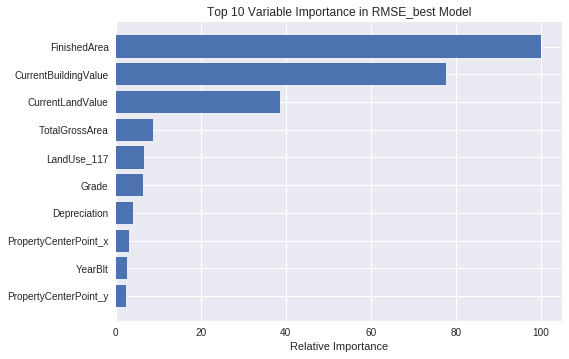

In [21]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, RMSEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in RMSE_best Model')
plt.show()

#### Second, we will see the top ten features in the MAPE_best model(loss='huber', n_estimators=150, max_depth=4, alpha=0.9, RMSE=99671, MAPE=19.51%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.CurrentBuildingValue, 2.CurrentLandValue, 3.FinishedArea, 4.TotalGrossArea, 5.Grade, 6.LandUse_117, 7.Depreciation, 8.PropertyCenterPoint_x, 9.PropertyCenterPoint_y, 10.CurrentAcres.

In [23]:
MAPEbest_reg = GradientBoostingRegressor(loss='huber',n_estimators=150,max_depth=4,alpha=0.9,random_state=0)
MAPEbest_reg.fit(X_train, y_train)


MAPEbest_feature_importance = MAPEbest_reg.feature_importances_
# make importances relative to max importance
MAPEbest_feature_importance = 100.0 * (MAPEbest_feature_importance / MAPEbest_feature_importance.max())
sorted_idx = np.argsort(MAPEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['CurrentAcres', 'PropertyCenterPoint_y', 'PropertyCenterPoint_x',
       'Depreciation', 'LandUse_117', 'Grade', 'TotalGrossArea',
       'FinishedArea', 'CurrentLandValue', 'CurrentBuildingValue'],
      dtype='object')


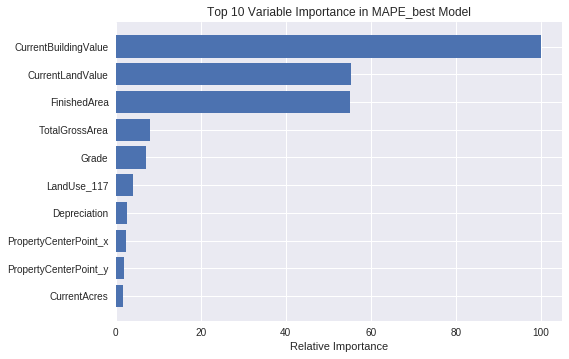

In [24]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, MAPEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in MAPE_best Model')
plt.show()

### Conlusions
* The estimation of SalePrice of the Gradient Boosting Regression can achieve an RSME about $99000 and an MAPE about 20%.
* The dominating features in the Gradient Boosting Regression are CurrentBuildingValue, CurrentLandValue, and FinishedArea.
* Other features that are less significant but also helpful in the estimation of sale prices are TotalGrossArea, Grade of the housing property, Depreciation of the housing property, CurrentAcres, Location, IsMobileHome(LandUse_117), YearBlt.

Next, we will try XGBoosting Regression which is an advanced version of Gradient Boosting Regression. Presumably, higher accuracy on estimation of sale prices can be achieved.

## XGBoosting Regression

#### First, check the accuracy of the model with default settings.

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbreg = xgb.XGBRegressor(random_state=0)
xgbreg.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, xgbreg.predict(X_test)))
print("RMSE: %.4f" % rmse)
print("MAPE: %.4f" % np.mean(np.abs(xgbreg.predict(X_test)-y_test)/y_test))

RMSE: 103612.4435
MAPE: 0.2267


#### Next, we search models with the the lowest RMSE and the lowest MAPE. Three parameters are chosen to be tuned.
* N_Estimators: Number of boosted trees to fit from 50 to 500 with a step of 50.
* Max_depth: Maximum depth of the individual regression estimators from 2 to 8.
* Learning_rate(Eta): Boosting learning rate(Step size shrinkage used in update to prevents overfitting). We test the etas of 0.1, 0.3, 0.5, 0.7, 0.9
##### Details on the parameters can be found in (https://xgboost.readthedocs.io/en/latest/python/python_api.html). A finer grid search on more parameters will potentially result in better models. We use the current tuning method which is much less time-expensive but gives some satisfying results also. 

In [28]:
# Initial model 
reg0 = xgb.XGBRegressor(random_state=0)
reg0.fit(X_train, y_train)
rmse0 = np.sqrt(mean_squared_error(y_test, reg0.predict(X_test)))
mape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best RMSE/MPE model and parameters
RMSEbest_reg = reg0
RMSEbest_rmse = rmse0
RMSEbest_mape = mape0
RMSEbest_n_estimators = 100 # default
RMSEbest_max_depth = 3 # default
RMSEbest_learning_rate = 0.1 # default


MAPEbest_reg = reg0
MAPEbest_rmse = rmse0
MAPEbest_mape = mape0
MAPEbest_n_estimators = 100 # default
MAPEbest_max_depth = 3 # default
MAPEbest_learning_rate = 0.1 # default


# Search for the best models
N_estimators = np.arange(50,550,50)
Depth = np.arange(2,9,1)
Learning_rate = np.arange(0.1,1,0.2) 

for n_est in N_estimators: 
    for d in Depth:
        for lr in Learning_rate:
            reg = xgb.XGBRegressor(n_estimators=n_est, max_depth=d, learning_rate=lr, random_state=0)
            reg.fit(X_train, y_train)
            rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
            mape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            
            if rmse<RMSEbest_rmse: #### Search for the model with lowest RMSE
                RMSEbest_reg = reg
                RMSEbest_rmse = rmse
                RMSEbest_mape = mape 
                RMSEbest_n_estimators = n_est
                RMSEbest_max_depth = d
                RMSEbest_learning_rate = lr

            if mape<MAPEbest_mape: #### Search for the model with lowest MAPE
                MAPEbest_reg = reg
                MAPEbest_rmse = rmse
                MAPEbest_mape = mape 
                MAPEbest_n_estimators = n_est
                MAPEbest_max_depth = d
                MAPEbest_learning_rate = lr              
            
print("RMSE_best n_estimators = %.0f" % RMSEbest_n_estimators)           
print("RMSE_best max_depth = %.0f" % RMSEbest_max_depth)
print("RMSE_best learning_rate = %.1f" % RMSEbest_learning_rate)
print("RMSE_best rmse = %.4f" % RMSEbest_rmse)
print("RMSE_best mape = %.4f" % RMSEbest_mape)  

print("______________________________________")

print("MAPE_best n_estimators = %.0f" % MAPEbest_n_estimators)           
print("MAPE_best max_depth = %.0f" % MAPEbest_max_depth)
print("MAPE_best learning_rate = %.1f" % MAPEbest_learning_rate)
print("MAPE_best rmse = %.4f" % MAPEbest_rmse)
print("MAPE_best mape = %.4f" % MAPEbest_mape) 


RMSE_best n_estimators = 50
RMSE_best max_depth = 6
RMSE_best learning_rate = 0.1
RMSE_best rmse = 97922.2632
RMSE_best mape = 0.2054
______________________________________
MAPE_best n_estimators = 100
MAPE_best max_depth = 6
MAPE_best learning_rate = 0.1
MAPE_best rmse = 99236.9281
MAPE_best mape = 0.2000


###Results: Compared to the model with default parameters. The models with the lowest RMSE/MAPE are improved in predicting unseen data. 
* The model with the lowest RSME is the model with n_estimator=50, max_depth=6, learning_rate=0.1. It has RSME=97922 and MAPE=20.54%. 
* The model with the lowest MAPE is the model with n_estimator=100, max_depth=6, learning_rate=0.1. It has RSME=99236 and MAPE=20.00%.

### To conclude the analysis on XGBoosting regression models, the feature importance of the best models will be shown.

#### First, we will see the top ten features in the RMSE_best model( n_estimators=50, max_depth=6, learning_rate=0.1, RMSE=97922, MAPE=20.54%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.CurrentBuildingValue, 2.CurrentLandValue, 3.TotalGrossArea, 4.CurrentAcres, 5.PropertyCenterPoint_x, 6.PropertyCenterPoint_y, 7.Depreciation, 8.FinishedArea, 9.YearBlt, 10.Grade.

In [14]:
RMSEbest_reg = xgb.XGBRegressor(n_estimators=50,max_depth=6,learning_rate=0.1,random_state=0)
RMSEbest_reg.fit(X_train, y_train)


RMSEbest_feature_importance = RMSEbest_reg.feature_importances_
# make importances relative to max importance
RMSEbest_feature_importance = 100.0 * (RMSEbest_feature_importance / RMSEbest_feature_importance.max())
sorted_idx = np.argsort(RMSEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['Grade', 'YearBlt', 'FinishedArea', 'Depreciation',
       'PropertyCenterPoint_y', 'PropertyCenterPoint_x', 'CurrentAcres',
       'TotalGrossArea', 'CurrentLandValue', 'CurrentBuildingValue'],
      dtype='object')


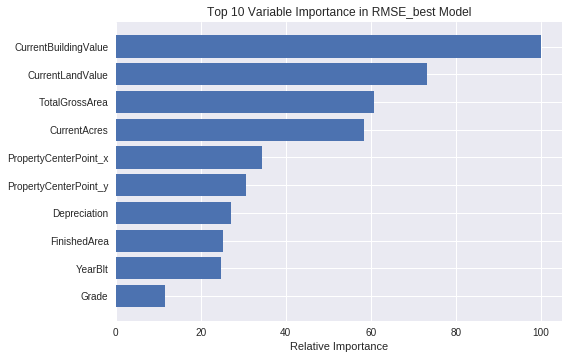

In [15]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, RMSEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in RMSE_best Model')
plt.show()

#### Second, we will see the top ten features in the MAPE_best model(n_estimators=100, max_depth=6, learning_rate=0.1, RMSE=99236, MAPE=20.00%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.CurrentBuildingValue, 2.CurrentAcres, 3.TotalGrossArea, 4.CurrentLandValue, 5.PropertyCenterPoint_y, 6.PropertyCenterPoint_x, 7.FinishedArea, 8.Depreciation, 9.YearBlt, 10.NumofRooms.  .

In [19]:
MAPEbest_reg = xgb.XGBRegressor(n_estimators=100,max_depth=6,learning_rate=0.1,random_state=0)
MAPEbest_reg.fit(X_train, y_train)


MAPEbest_feature_importance = MAPEbest_reg.feature_importances_
# make importances relative to max importance
MAPEbest_feature_importance = 100.0 * (MAPEbest_feature_importance / MAPEbest_feature_importance.max())
sorted_idx = np.argsort(MAPEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['NumofRooms', 'YearBlt', 'Depreciation', 'FinishedArea',
       'PropertyCenterPoint_x', 'PropertyCenterPoint_y', 'CurrentLandValue',
       'TotalGrossArea', 'CurrentAcres', 'CurrentBuildingValue'],
      dtype='object')


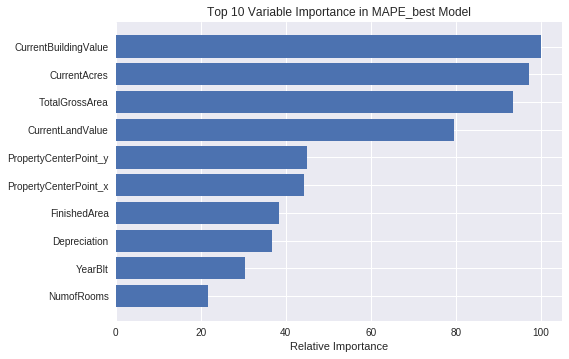

In [21]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, MAPEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in MAPE_best Model')
plt.show()

### Conlusions
* The estimation of SalePrice of the XGBoosting Regression can achieve an RSME about $98000 and an MAPE about 20%.Compared to the classical Gradient Boosting Regression, XGBoosting Regression has the power of reducing RMSE but does not seem to reduce MAPE. 
* The top 4 features in the XGBoosting Regression are CurrentBuildingValue, CurrentLandValue, CurrentAcres and TotalGrossArea.
Other important features are FinishedArea, Depreciation of a housing property, Location, YearBlt, NumofRooms and Grade of a housing property.
* The top ten features for XGBoosting are similar to their counterpart in the classical Gradient Boosting. Unlike the classical Gradient Boosting where the top three features are dominating, the top 4 features in XGBoosting do not dominate among the top 10 features.

The last tree-based algorithm we will try is the Random Forest Regression. Random Forest uses the idea of bagging(voting by each individual decision tree) instead of Boosting(modelling the error).

## Random Forest Regression


#### First, check the accuracy of the model with default settings.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(random_state=0)
RFreg.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, RFreg.predict(X_test)))
print("RMSE: %.4f" % rmse)
print("MAPE: %.4f" % np.mean(np.abs(RFreg.predict(X_test)-y_test)/y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 112725.1626
MAPE: 0.2123


#### Next, we search models with the the lowest RMSE and the lowest MAPE. Three parameters are chosen to be tuned.
* N_Estimators: Number of trees from 100 to 500 with a step of 100. 
* Max_depth: Maximum depth of the individual tree from 100 to 500 with a step of 100. The default is unlimited. We choose a small range to avoid overfitting.
* Min_samples_split:  The minimum number of samples required to split an internal node from 2 to 10 with a step size of 2. Note that the default is 2. We choose larger numbers to avoid overfitting.
##### Details on the parameters can be found in https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html . A finer grid search on more parameters will potentially result in better models. We use the current tuning method which is much less time-expensive but gives some satisfying results also. 

In [29]:
# Initial model 
reg0 = RandomForestRegressor(random_state=0)
reg0.fit(X_train, y_train)
rmse0 = np.sqrt(mean_squared_error(y_test, reg0.predict(X_test)))
mape0 = np.mean(np.abs(reg0.predict(X_test)-y_test)/y_test)

# Initialize the best RMSE/MPE model and parameters
RMSEbest_reg = reg0
RMSEbest_rmse = rmse0
RMSEbest_mape = mape0
RMSEbest_n_estimators = 10 # default
RMSEbest_max_depth = 'None' # default is None
RMSEbest_min_samples_split = 2 # default


MAPEbest_reg = reg0
MAPEbest_rmse = rmse0
MAPEbest_mape = mape0
MAPEbest_n_estimators = 10 # default
MAPEbest_max_depth = 'None' # default is None
MAPEbest_min_samples_split = 2 # default


# Search for the best models
N_estimators = np.arange(100,600,100)
Depth = np.arange(100,600,100)
Min_samples_split = np.arange(2,12,2) 

for n_est in N_estimators: 
    for d in Depth:
        for ms in Min_samples_split:
            reg = RandomForestRegressor(n_estimators=n_est, max_depth=d, min_samples_split=ms, random_state=0)
            reg.fit(X_train, y_train)
            rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
            mape = np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
            
            if rmse<RMSEbest_rmse: #### Search for the model with lowest RMSE
                RMSEbest_reg = reg
                RMSEbest_rmse = rmse
                RMSEbest_mape = mape 
                RMSEbest_n_estimators = n_est
                RMSEbest_max_depth = d
                RMSEbest_min_samples_split = ms

            if mape<MAPEbest_mape: #### Search for the model with lowest MAPE
                MAPEbest_reg = reg
                MAPEbest_rmse = rmse
                MAPEbest_mape = mape 
                MAPEbest_n_estimators = n_est
                MAPEbest_max_depth = d
                MAPEbest_min_samples_split = ms              
            
print("RMSE_best n_estimators = %.0f" % RMSEbest_n_estimators)           
print("RMSE_best max_depth = %.0f" % RMSEbest_max_depth)
print("RMSE_best min_samples_split = %.1f" % RMSEbest_min_samples_split)
print("RMSE_best rmse = %.4f" % RMSEbest_rmse)
print("RMSE_best mape = %.4f" % RMSEbest_mape)  

print("______________________________________")

print("MAPE_best n_estimators = %.0f" % MAPEbest_n_estimators)           
print("MAPE_best max_depth = %.0f" % MAPEbest_max_depth)
print("MAPE_best min_samples_split = %.1f" % MAPEbest_min_samples_split)
print("MAPE_best rmse = %.4f" % MAPEbest_rmse)
print("MAPE_best mape = %.4f" % MAPEbest_mape) 


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE_best n_estimators = 100
RMSE_best max_depth = 100
RMSE_best min_samples_split = 10.0
RMSE_best rmse = 105349.8688
RMSE_best mape = 0.2001
______________________________________
MAPE_best n_estimators = 500
MAPE_best max_depth = 100
MAPE_best min_samples_split = 10.0
MAPE_best rmse = 106277.3284
MAPE_best mape = 0.1998


###Results: Compared to the model with default parameters. The models with the lowest RMSE/MAPE are improved in predicting unseen data. 
* The model with the lowest RSME is the model with n_estimators=100, max_depth=100, min_samples_split=10. It has RSME=105350 and MAPE=20.01%. 
* The model with the lowest MAPE is the model with n_estimators=500, max_depth=100, min_samples_split=10. It has RSME=106277 and MAPE=19.98%.

### To conclude the analysis on Random Forest regression models, the feature importance of the best models will be shown.

#### First, we will see the top ten features in the RMSE_best model( n_estimators=100, max_depth=100, min_samples_split=10, RMSE=105350, MAPE=20.01%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.CurrentBuildingValue, 2.CurrentLandValue, 3.TotalGrossArea, 4.FinishedArea, 5.NumofUnits, 6.CurrentAcres, 7.NumofRooms, 8.PropertyCenterPoint_x, 9.PropertyCenterPoint_y, 10.Depreciation.

In [30]:
RMSEbest_reg = RandomForestRegressor(n_estimators=100,max_depth=100,min_samples_split=10,random_state=0)
RMSEbest_reg.fit(X_train, y_train)


RMSEbest_feature_importance = RMSEbest_reg.feature_importances_
# make importances relative to max importance
RMSEbest_feature_importance = 100.0 * (RMSEbest_feature_importance / RMSEbest_feature_importance.max())
sorted_idx = np.argsort(RMSEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['Depreciation', 'PropertyCenterPoint_y', 'PropertyCenterPoint_x',
       'NumofRooms', 'CurrentAcres', 'NumofUnits', 'FinishedArea',
       'TotalGrossArea', 'CurrentLandValue', 'CurrentBuildingValue'],
      dtype='object')


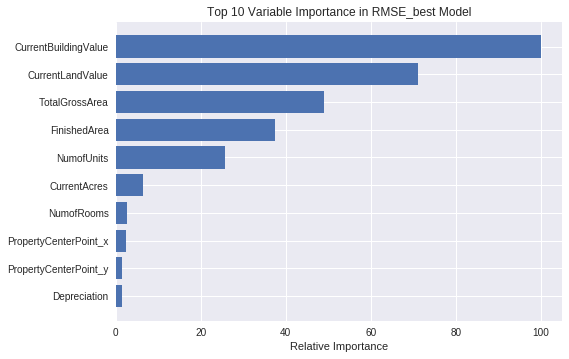

In [31]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, RMSEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in RMSE_best Model')
plt.show()

#### Second, we will see the top ten features in the MAPE_best model(n_estimators=500, max_depth=100, min_samples_split=10, RMSE=106277, MAPE=19.98%). 
* The top ten features in the RMSE_best model from the most important to the least important are: 1.CurrentBuildingValue, 2.CurrentLandValue, 3.TotalGrossArea, 4.FinishedArea, 5.NumofUnits, 6.CurrentAcres, 7.NumofRooms,  8.PropertyCenterPoint_x, 9.Depreciation, 10.PropertyCenterPoint_y. 

In [33]:
MAPEbest_reg = RandomForestRegressor(n_estimators=500,max_depth=100,min_samples_split=10,random_state=0)
MAPEbest_reg.fit(X_train, y_train)


MAPEbest_feature_importance = MAPEbest_reg.feature_importances_
# make importances relative to max importance
MAPEbest_feature_importance = 100.0 * (MAPEbest_feature_importance / MAPEbest_feature_importance.max())
sorted_idx = np.argsort(MAPEbest_feature_importance)[-10:]
print(X.columns[sorted_idx])

Index(['PropertyCenterPoint_y', 'Depreciation', 'PropertyCenterPoint_x',
       'NumofRooms', 'CurrentAcres', 'NumofUnits', 'FinishedArea',
       'TotalGrossArea', 'CurrentLandValue', 'CurrentBuildingValue'],
      dtype='object')


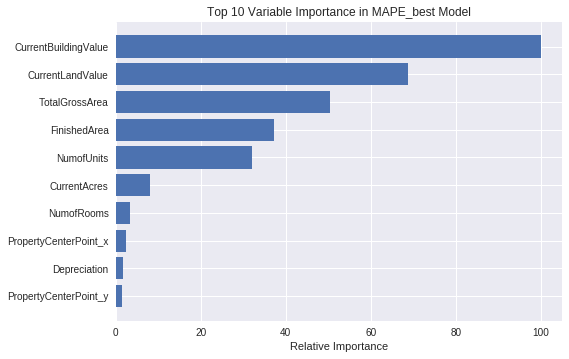

In [34]:
import matplotlib.pyplot as plt
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, MAPEbest_feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Top 10 Variable Importance in MAPE_best Model')
plt.show()

### Conlusions
* The estimation of SalePrice of the XGBoosting Regression can achieve an RSME about $105000 and an MAPE about 20%.Compared to Boosting Algorithms, the Random Forest Regression models we have found are not doing better jobs in reducing RSME and MAPE. 
* The top 5 features in our tuned Random Forest Regression models are CurrentBuildingValue, CurrentLandValue, TotalGrossArea, FinishedArea and NumofUnits. They are dominant over other features.
* The top ten features for XGBoosting are similar to their counterpart in the Boosting Algorithms. 

Finally, we look at the results given by a linear regression model. It serves as a reference point on how tree-based models improve estimation accuracies.

## Linear Regression

#### First, we apply the linear regression model with default setting to the scaled training and test sets . We see that both RMSE and MAPE are incredibly huge. 
* This is due to the math of linear regressions. Scaling the features to be in range [0,1] makes the intercept term dominant, resulting in a poorly-fit linear model. We do not need to do scaling in linear regressions. The scaling is done automatically when computing the coeffiecients of the variables(features).

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))
print("RMSE: %.4f" % rmse)
print("MAPE: %.4f" % np.mean(np.abs(linreg.predict(X_test)-y_test)/y_test))

RMSE: 3244452974982368.5000
MAPE: 460635710.3733


#### Remove the scaling, the linear regression improves a lot. But compared to the results in tree-based algotithms, the linear regression model is less accurate in terms of both RSME and MAPE.

In [60]:
X = df_feature.drop(columns=['SalePrice'])
y = df_feature.SalePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
###Note that we did not apply Standard Scaler here.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, y_train)
rmse = mean_squared_error(y_test, linreg.predict(X_test))
print("RMSE: %.4f" % mse)
print("MAPE: %.4f" % np.mean(np.abs(reg.predict(X_test)-y_test)/y_test))

MSE: 13545556420.7914
Square of MSE: 116385.3789
Average Percentage of Abosulute Error: 0.2332


## Final Remarks
* 1.With the author's best effort, the model with the least RMSE is achieved by XGBoosting Regression, which gives an RMSE of $97922 and an MAPE of 20.54%. 

* 2.With the author's best effort, the model with the least MAPE is achieved by the classical Gradient Boosting Regression, which gives an RMSE of $99671 and an MAPE of 19.51%.

* 3.Based on what we have found so far, Boosting seems to beat Bagging in terms of accurate estimation of Sale Prices.

* 4.For practical use, the author would recommend clients to use the least MAPE model given by Gradient Boosting Regression(See 2) based on the finding that for most models the MAPE rarely gets below 20% and the fact that this model also has low RMSE.

* 5.Top features to look for in transaction of a housing properties are: CurrentBuildingValue, CurrentLandValue, FinishedArea, TotalGrossArea, CurrentAcres, YearBlt, Depreciation, Location(Latitude&Longitude), Grade, LandUse_IsMoblieHome.